In [54]:
#%% libraries
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

#%% data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
covid_df.head(4)

iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
UID                                                                        
84001001   US  USA    840  1001.0  Autauga        Alabama             US   
84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
84001005   US  USA    840  1005.0  Barbour        Alabama             US   
84001007   US  USA    840  1007.0     Bibb        Alabama             US   

                Lat      Long_          Combined_Key  ...  2/28/23  3/1/23  \
UID                                                   ...                    
84001001  32.539527 -86.644082  Autauga, Alabama, US  ...    19732   19759   
84001003  30.727750 -87.722071  Baldwin, Alabama, US  ...    69641   69767   
84001005  31.868263 -85.387129  Barbour, Alabama, US  ...     7451    7474   
84001007  32.996421 -87.125115     Bibb, Alabama, US  ...     8067    8087   

          3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
UID                                                                       
84001001   19759   19759   19759   19759   19759   19759   19790   19790  
84001003   69767   69767   69767   69767   69767   69767   69860   69860  
84001005    7474    7474    7474    7474    7474    7474    7485    7485  
84001007    8087    8087    8087    8087    8087    8087    8091    8091  

[4 rows x 1153 columns]

# Question 1
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should

-Show cases over time

-Have all counties plotted in a background color (something like grey)

-Have a single county plotted in a contrasting color (something not grey)

-Have well formatted dates as the X axis

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24940\1105440831.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_counties_time_series.index = pd.to_datetime(utah_counties_time_series.index)


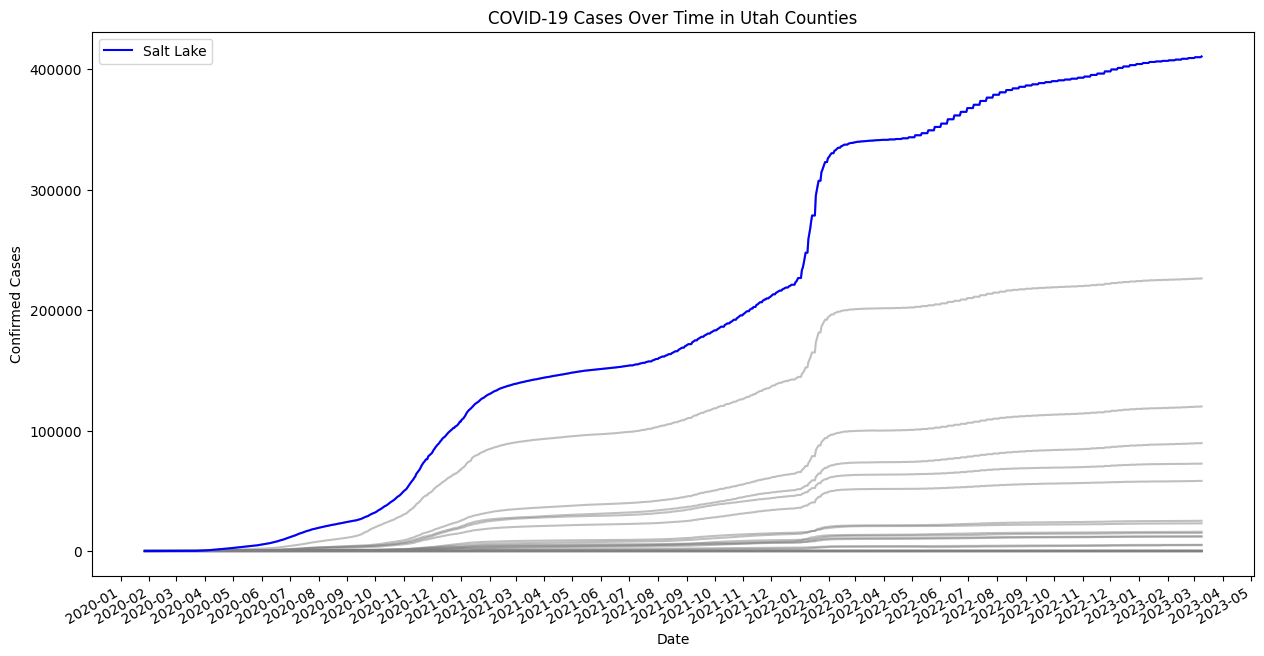

In [56]:
# Filtering the data for counties in Utah and setting 'Admin2' as the county name
utah_counties_df = covid_df[covid_df['Province_State'] == 'Utah'].set_index('Admin2')

# Dropping non-relevant columns for the visualization
columns_to_drop = ['iso2', 'iso3', 'code3', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_']
utah_counties_df = utah_counties_df.drop(columns=columns_to_drop)

# Identifying the date columns for the time series data
date_columns = utah_counties_df.columns[6:]  # Excluding non-date columns

# Filtering the data to include only date columns
utah_counties_time_series = utah_counties_df[date_columns]

# Transposing the dataframe for easier plotting
utah_counties_time_series = utah_counties_time_series.T

# Converting the index to datetime for plotting
utah_counties_time_series.index = pd.to_datetime(utah_counties_time_series.index)

# Plotting all counties in Utah with a grey background
plt.figure(figsize=(15, 8))
for county in utah_counties_time_series.columns:
    plt.plot(utah_counties_time_series.index, utah_counties_time_series[county], color='grey', alpha=0.5)

# Highlighting a single county (let's choose the first county) in a contrasting color
highlighted_county = utah_counties_time_series.columns[20]
plt.plot(utah_counties_time_series.index, utah_counties_time_series[highlighted_county], color='blue', label=highlighted_county)

# Formatting the dates on the X-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotation

# Adding a title and labels
plt.title('COVID-19 Cases Over Time in Utah Counties')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()

# Show the plot
plt.show()



# Question 2

Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
    
-Have only two counties plotted
    
-Highlight the difference between the two comparison counties

You may use any style of graphic you like as long as it is effective (dense)
and readable


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24940\1052857906.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_time_series.index = pd.to_datetime(florida_time_series.index)


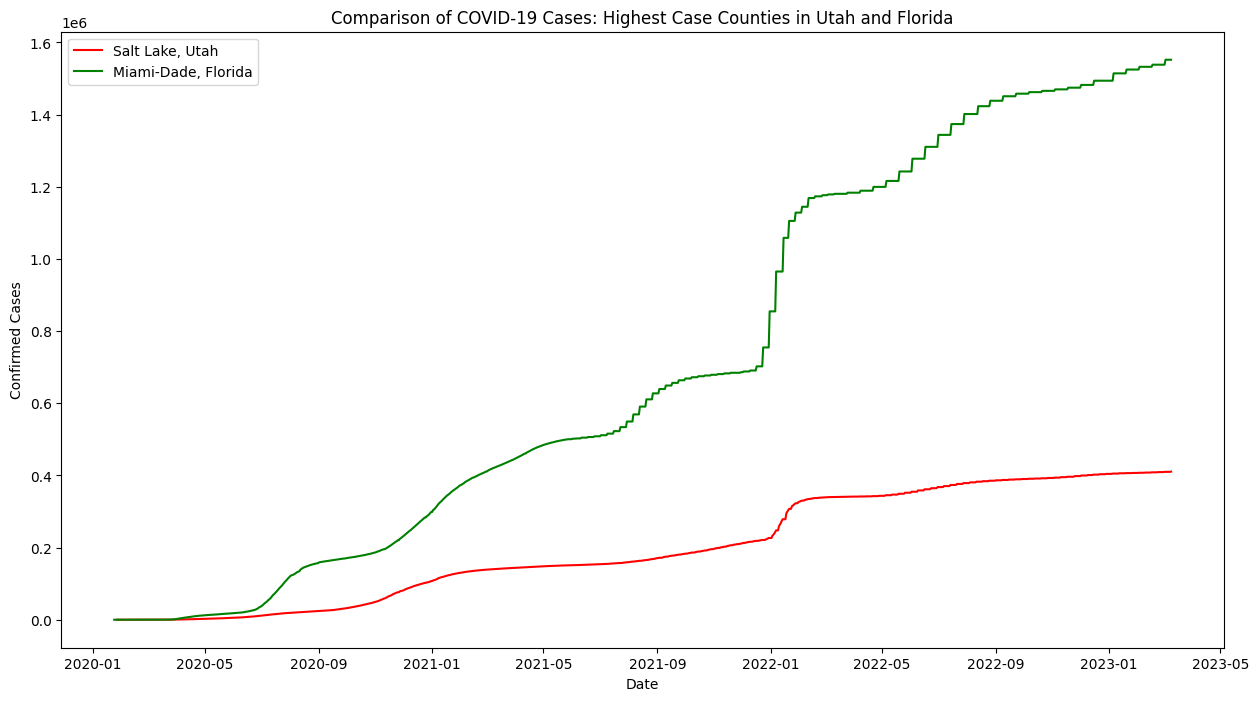

In [57]:
# Finding the county in Utah with the most cases to date
utah_latest_date = utah_counties_time_series.index[-1]
utah_max_cases_county = utah_counties_time_series.loc[utah_latest_date].idxmax()

# Filtering the data for counties in Florida
florida_df = covid_df[covid_df['Province_State'] == 'Florida'].set_index('Admin2')
florida_time_series = florida_df.iloc[:, 11:].T
florida_time_series.index = pd.to_datetime(florida_time_series.index)

# Finding the county in Florida with the most cases to date
florida_latest_date = florida_time_series.index[-1]
florida_max_cases_county = florida_time_series.loc[florida_latest_date].idxmax()

# Extracting time series for these specific counties
utah_max_cases_data = utah_counties_time_series[utah_max_cases_county]
florida_max_cases_data = florida_time_series[florida_max_cases_county]

# Plotting the counties
plt.figure(figsize=(15, 8))
plt.plot(utah_max_cases_data, label=f'{utah_max_cases_county}, Utah', color='red')
plt.plot(florida_max_cases_data, label=f'{florida_max_cases_county}, Florida', color='green')

# Adding title, labels, and legend
plt.title('Comparison of COVID-19 Cases: Highest Case Counties in Utah and Florida')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()

# Show the plot
plt.show()

# Question 3
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:

-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

-Use color to contrast the two series being plotted

-Have well formatted dates as the X axis

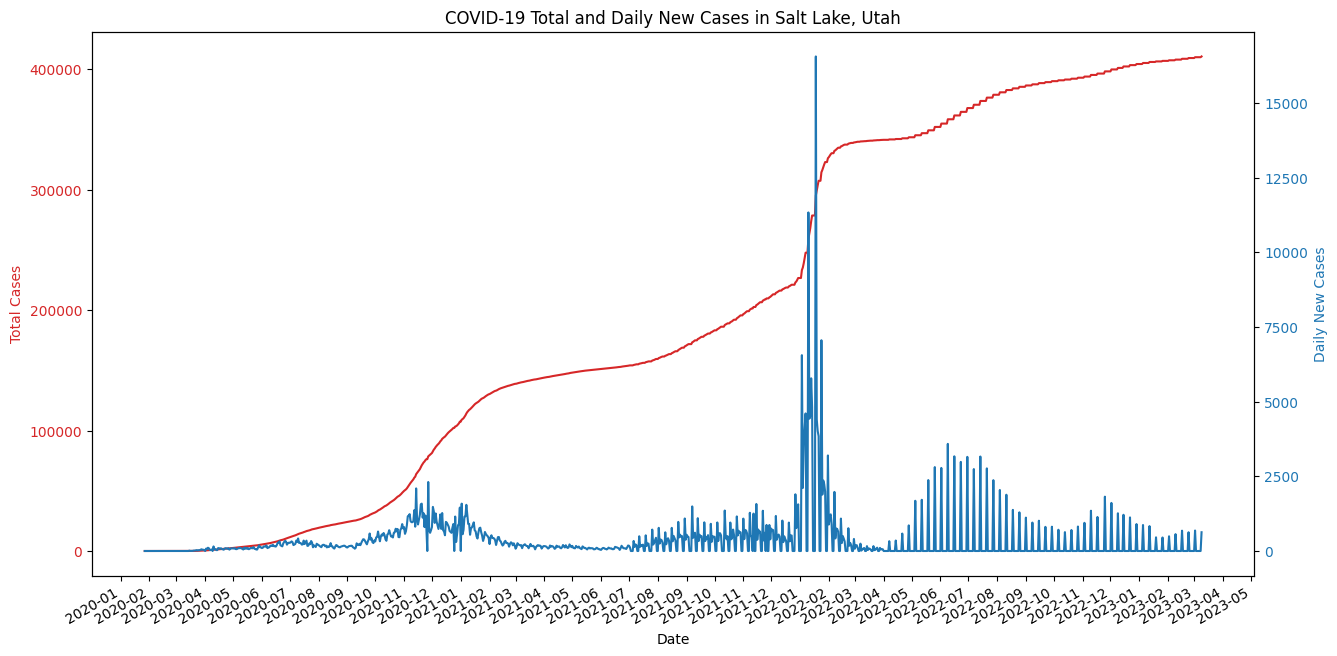

In [58]:
# Choosing a single county for the visualization - let's use the county with the most cases in Utah
selected_county_data = utah_counties_time_series[utah_max_cases_county]

# Calculating the daily new cases for the selected county
daily_new_cases = selected_county_data.diff().fillna(0)

# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plotting running total of cases on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.plot(selected_county_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for daily new cases
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Daily New Cases', color=color)
ax2.plot(daily_new_cases, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Formatting the dates on the X-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()  # Rotation

# Adding a title
plt.title(f'COVID-19 Total and Daily New Cases in {utah_max_cases_county}, Utah')

# Show the plot
plt.show()


# Question 4
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:

-Have a single column delineate a state

-Have each 'slice' or column compontent represent a county

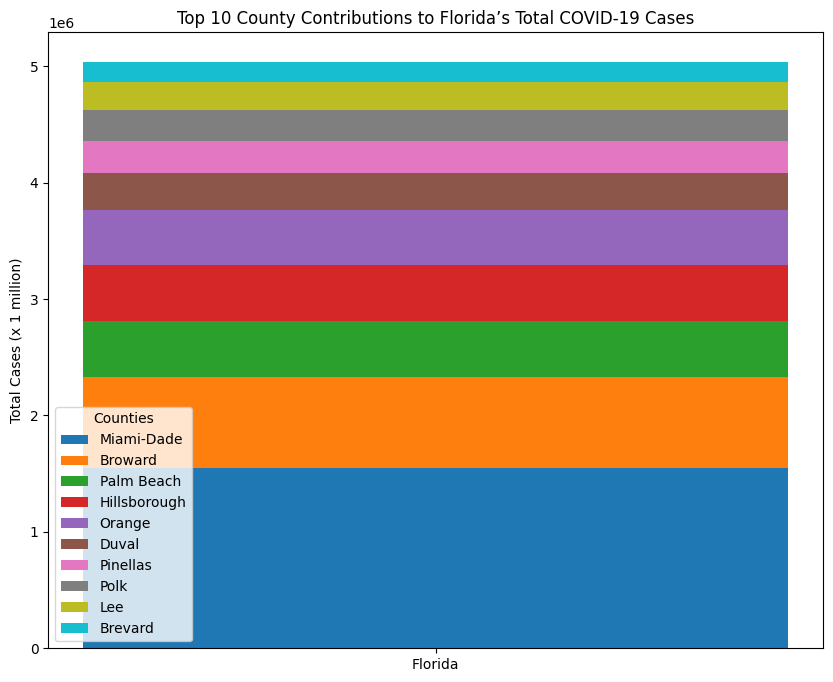

In [64]:
import numpy as np

# Choosing a state for the visualization - let's use Florida
florida_latest_data = florida_time_series.loc[florida_latest_date]

# Sorting the counties by the number of cases for better visualization
florida_sorted_data = florida_latest_data.sort_values(ascending=False)

# We will limit the number of counties to the top 10 for readability
top_counties = florida_sorted_data.head(10)

# Preparing data for stacked bar chart
bottom = np.zeros(len(top_counties))

# Creating the plot
plt.figure(figsize=(10, 8))
for county in top_counties.index:
    plt.bar('Florida', top_counties[county], bottom=bottom, label=county)
    bottom += top_counties[county]

# Adding title, labels, and legend
plt.title('Top 10 County Contributions to Florida’s Total COVID-19 Cases')
plt.ylabel('Total Cases (x 1 million)')
plt.legend(title='Counties')

# Show the plot
plt.show()

# Extra credit question
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 
cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)

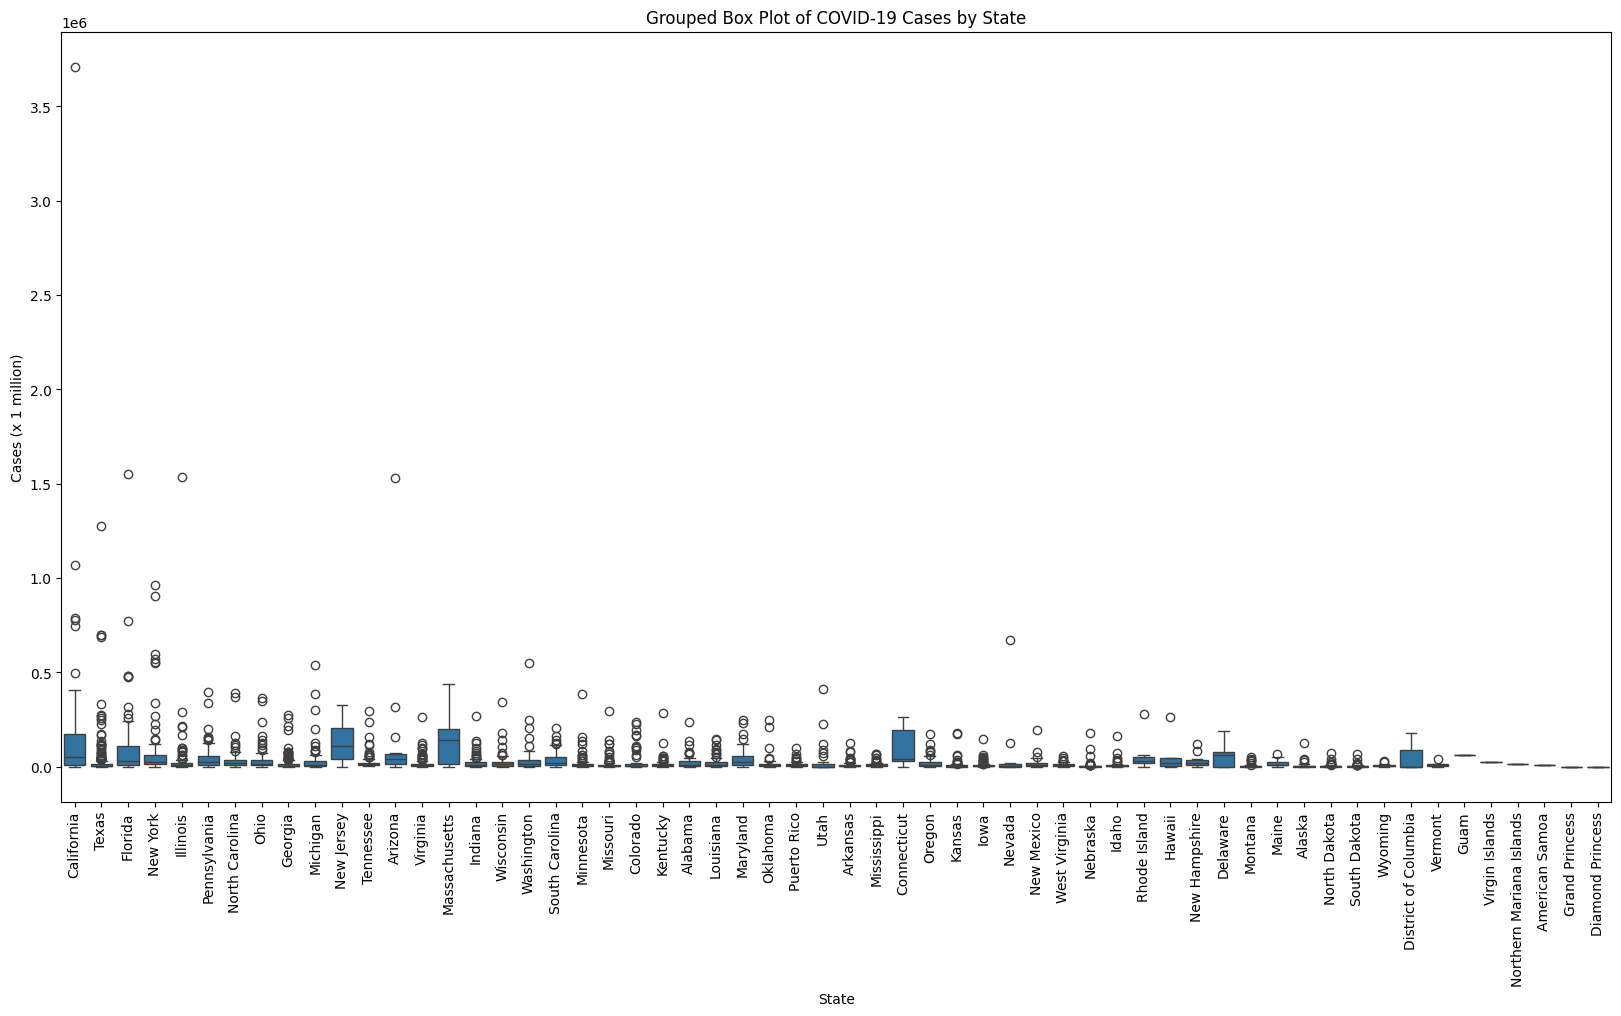

In [63]:
# Calculating the total cases for each state on the latest date available in the dataset
latest_date_column = covid_df.columns[-1]
state_totals = covid_df.groupby('Province_State')[latest_date_column].sum()

# Sorting the states by total cases
sorted_states = state_totals.sort_values(ascending=False).index

# Extracting the relevant columns for the boxplot
boxplot_data = covid_df[['Province_State', latest_date_column]]

# Renaming columns for clarity in the plot
boxplot_data = boxplot_data.rename(columns={latest_date_column: 'Cases'})

# Creating the grouped box plot
plt.figure(figsize=(20, 10))
sns.boxplot(x='Province_State', y='Cases', data=boxplot_data, order=sorted_states)

# Formatting the plot
plt.xticks(rotation=90)
plt.title('Grouped Box Plot of COVID-19 Cases by State')
plt.xlabel('State')
plt.ylabel('Cases (x 1 million)')

# Show the plot
plt.show()